### DAT Final Project: Telco Customer Churn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
file = 'Telco-Customer-Churn.csv'
cust = pd.read_csv(file)

-----

## Exploratory Data Analysis

In [3]:
cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
cust.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [6]:
cust.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
cust.shape

(7043, 21)

In [8]:
cust['Churn_Numeric'] = cust.Churn.map({'No':0, 'Yes':1})

In [9]:
cust.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Churn_Numeric'],
      dtype='object')

---

### Compare Feature Behavior between Churn Customters

In [10]:
cust.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [11]:
lost = cust.loc[cust['Churn'] == 'Yes']

In [12]:
kept = cust.loc[cust['Churn'] == 'No']

In [13]:
lost.describe()

,SeniorCitizen,tenure,MonthlyCharges,Churn_Numeric
count,1869.000000,1869.000000,1869.000000,1869.0
mean,0.254682,17.979133,74.441332,1.0
std,0.435799,19.531123,24.666053,0.0
min,0.000000,1.000000,18.850000,1.0
25%,0.000000,2.000000,56.150000,1.0
50%,0.000000,10.000000,79.650000,1.0
75%,1.000000,29.000000,94.200000,1.0
max,1.000000,72.000000,118.350000,1.0


In [14]:
kept.describe()

,SeniorCitizen,tenure,MonthlyCharges,Churn_Numeric
count,5174.000000,5174.000000,5174.000000,5174.0
mean,0.128721,37.569965,61.265124,0.0
std,0.334923,24.113777,31.092648,0.0
min,0.000000,0.000000,18.250000,0.0
25%,0.000000,15.000000,25.100000,0.0
50%,0.000000,38.000000,64.425000,0.0
75%,0.000000,61.000000,88.400000,0.0
max,1.000000,72.000000,118.750000,0.0


In [15]:
cust.TotalCharges.tail(10)

7033    2625.25
7034    6886.25
7035     1495.1
7036      743.3
7037     1419.4
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, dtype: object

In [16]:
def emptystr(x):
    try:
        return float(x)
    except:
        return 0
#how to get rid of empty strings

In [17]:
cust["TotalCharges"]= cust.TotalCharges.apply(emptystr)

In [18]:
float(np.nan)

nan

In [19]:
cust.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Churn_Numeric'],
      dtype='object')

In [20]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
Churn_Numeric       7043 non-nul

In [21]:
cust.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_Numeric
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,0.265370
std,0.368612,24.559481,30.090047,2266.794470,0.441561
min,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000
50%,0.000000,29.000000,70.350000,1394.550000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


---

## Feature Selection

### Demographics Analysis

**Marital Status**

In [22]:
cust.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Churn_Numeric'],
      dtype='object')

In [23]:
lost.Partner.value_counts(ascending = True)

Yes     669
No     1200
Name: Partner, dtype: int64

In [24]:
1200/(699+1200)

0.631911532385466

In [25]:
kept.Partner.value_counts(ascending = False)

Yes    2733
No     2441
Name: Partner, dtype: int64

In [26]:
2441/(2733+2441)

0.4717819868573637

**Gender**

In [27]:
lost.gender.value_counts()

Female    939
Male      930
Name: gender, dtype: int64

In [28]:
939/(939+930)

0.5024077046548957

In [29]:
kept.gender.value_counts()

Male      2625
Female    2549
Name: gender, dtype: int64

In [30]:
2549/(2625+2549)

0.49265558562040973

**Senior Citizen**

In [31]:
lost.SeniorCitizen.value_counts()

0    1393
1     476
Name: SeniorCitizen, dtype: int64

In [32]:
476/(1393+476)

0.2546816479400749

In [33]:
kept.SeniorCitizen.value_counts()

0    4508
1     666
Name: SeniorCitizen, dtype: int64

In [34]:
666/(4508+666)

0.12872052570545034

**Dependents**

In [35]:
lost.Dependents.value_counts()

No     1543
Yes     326
Name: Dependents, dtype: int64

In [36]:
326/(1543+326)

0.17442482611021937

In [37]:
kept.Dependents.value_counts()

No     3390
Yes    1784
Name: Dependents, dtype: int64

In [38]:
1784/(1784+3390)

0.3448009277155006

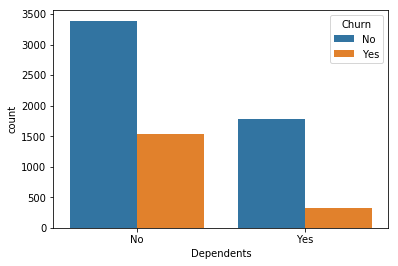

In [39]:
sns.countplot(cust.Dependents, hue=cust.Churn)

**Number of Serivices**

In [40]:
cust.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Churn_Numeric'],
      dtype='object')

In [41]:
services = ['PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies']

In [42]:
cust["TotalServices"]=cust.loc[:,services].replace({'Yes':1,'No':0, 'DSL':1,"Fiber optic":2,"No internet service":0,"No phone service":0}).sum(axis=1)

In [43]:
cust.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_Numeric,TotalServices
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,2
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,0,4
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,4
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,4
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,3
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,7
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,0,6
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,Month-to-month,No,Mailed check,29.75,301.90,No,0,2
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,8
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No,0,4


In [44]:
cust.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Churn_Numeric', 'TotalServices'],
      dtype='object')

Churn
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: TotalServices, dtype: object

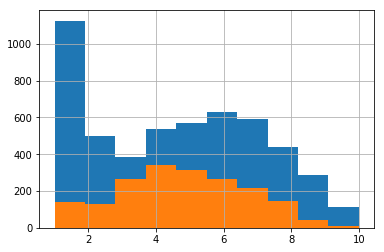

In [45]:
cust.groupby("Churn").TotalServices.hist()

In [46]:
lost = cust.loc[cust['Churn'] == 'Yes']

In [47]:
kept = cust.loc[cust['Churn'] == 'No']

In [48]:
lost.TotalServices.sum()

8907

In [49]:
kept.TotalServices.sum()

23391

**Tenure**

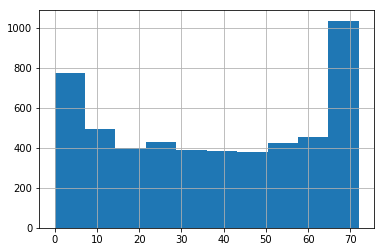

In [50]:
kept.tenure.hist()

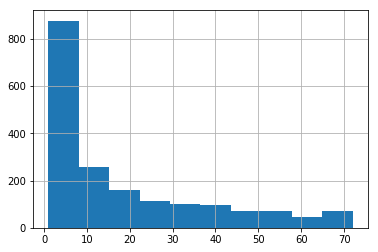

In [51]:
lost.tenure.hist()

### Cost Comparision

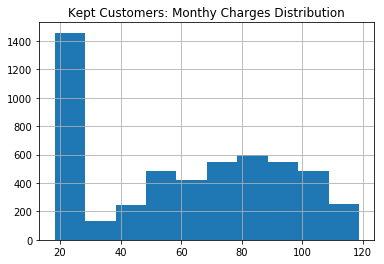

In [52]:
kept.MonthlyCharges.hist()
plt.title('Kept Customers: Monthy Charges Distribution');

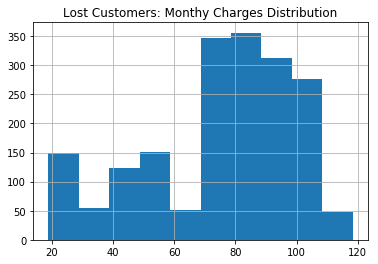

In [53]:
lost.MonthlyCharges.hist()
plt.title('Lost Customers: Monthy Charges Distribution');

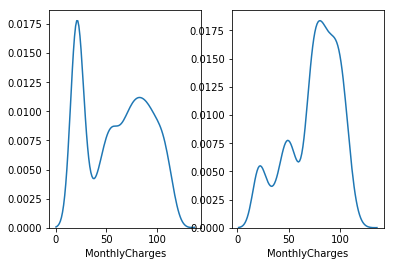

In [54]:
fig,ax=plt.subplots(nrows=1, ncols=2)
#ax[0].hist(kept.MonthlyCharges)
#ax[1].hist(lost.MonthlyCharges)
sns.distplot(kept.MonthlyCharges, ax=ax[0], hist=False)
sns.distplot(lost.MonthlyCharges, ax=ax[1],hist=False)

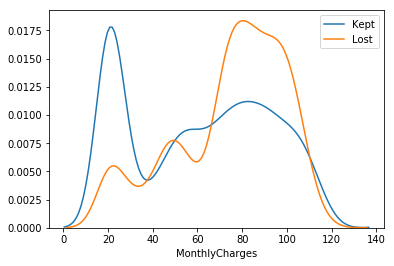

In [55]:
sns.distplot(kept.MonthlyCharges,hist=False, label="Kept")
sns.distplot(lost.MonthlyCharges,hist=False, label = "Lost")

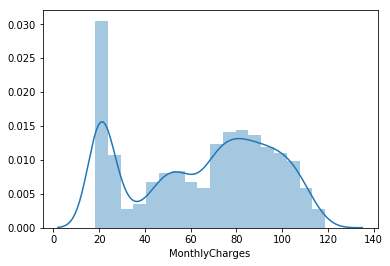

In [56]:
sns.distplot(cust.MonthlyCharges)

**Billing Methods**

In [57]:
cust.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Churn_Numeric', 'TotalServices'],
      dtype='object')

**Contract Type**

In [58]:
kept.Contract.value_counts()

Month-to-month    2220
Two year          1647
One year          1307
Name: Contract, dtype: int64

In [59]:
1647/(2220+1647+1307)

0.3183223811364515

In [60]:
2220/(2220+1647+1307)

0.4290684190181678

In [61]:
lost.Contract.value_counts()

Month-to-month    1655
One year           166
Two year            48
Name: Contract, dtype: int64

In [62]:
48/(1655+166+48)

0.025682182985553772

In [63]:
1655/(1655+166+48)

0.8855002675227395

**Paperless Billing**

In [64]:
kept.PaperlessBilling.value_counts()

Yes    2771
No     2403
Name: PaperlessBilling, dtype: int64

In [65]:
2771/(2771+2403)

0.5355624275222265

In [66]:
lost.PaperlessBilling.value_counts()

Yes    1400
No      469
Name: PaperlessBilling, dtype: int64

In [67]:
1400/(1400+469)

0.7490636704119851

In [68]:
kept.PaymentMethod.value_counts()

Mailed check                 1304
Electronic check             1294
Credit card (automatic)      1290
Bank transfer (automatic)    1286
Name: PaymentMethod, dtype: int64

In [69]:
2576/(1304+1294+1290+1286)

0.4978739853111712

In [70]:
1294+1304

2598

In [71]:
lost.PaymentMethod.value_counts()

Electronic check             1071
Mailed check                  308
Bank transfer (automatic)     258
Credit card (automatic)       232
Name: PaymentMethod, dtype: int64

In [72]:
490/(1071+308+258+232)

0.26217228464419473

In [73]:
1071+308


1379

# ---



**Confirmed List of Valid Feaures**

1. SeniorCitizen
2. Partner'
3. Dependents
4. TotalServices
5. MonthlyCharges
6. Contract
7. PaymentMethod
8. Tenure

**Next Steps**

1. Fix TotalCharges
2. Fit Data to Model

-------------------------

## Modeling

In [74]:
cust.columns
#Why are my feature columns now considered the only columns in the df?

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Churn_Numeric', 'TotalServices'],
      dtype='object')

In [75]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
Churn_Numeric       7043 non-nul

In [111]:
feature_cols = ['SeniorCitizen','Partner','Dependents','tenure','TotalServices','MonthlyCharges','Contract','PaymentMethod','TotalCharges']

In [112]:
y = cust['Churn_Numeric']

In [113]:
X =cust.loc[:,feature_cols].replace({'Month-to-month':1,'One year':1,'Two year':2,'Yes':1,'No':0, 'Electronic check':0,"Mailed check":0,"Bank transfer (automatic)":1,"Credit card (automatic)":1})


In [114]:
#X = cust[feature_cols]
y = cust.Churn_Numeric

In [115]:
lr = LinearRegression()

In [116]:
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [117]:
X

,SeniorCitizen,Partner,Dependents,tenure,TotalServices,MonthlyCharges,Contract,PaymentMethod,TotalCharges
0,0,1,0,1,2,29.85,1,0,29.85
1,0,0,0,34,4,56.95,1,0,1889.50
2,0,0,0,2,4,53.85,1,0,108.15
3,0,0,0,45,4,42.30,1,1,1840.75
4,0,0,0,2,3,70.70,1,0,151.65
5,0,0,0,8,7,99.65,1,0,820.50
6,0,0,1,22,6,89.10,1,1,1949.40
7,0,0,0,10,2,29.75,1,0,301.90
8,0,1,0,28,8,104.80,1,0,3046.05
9,0,0,1,62,4,56.15,1,1,3487.95


In [118]:
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [119]:
lr.coef_

array([ 7.99465458e-02,  3.63452120e-03, -3.84386506e-02, -1.72241449e-03,
       -6.20046037e-02,  1.05361936e-02, -2.71800658e-02, -5.09995689e-02,
       -5.61292556e-05])

In [120]:
pd.DataFrame({'coefs': lr.coef_, 'features': feature_cols})

,coefs,features
0,0.079947,SeniorCitizen
1,0.003635,Partner
2,-0.038439,Dependents
3,-0.001722,tenure
4,-0.062005,TotalServices
5,0.010536,MonthlyCharges
6,-0.027180,Contract
7,-0.051000,PaymentMethod
8,-0.000056,TotalCharges


In [121]:
lr.intercept_

0.10380690412911772

In [122]:
predictions = lr.predict(X)

In [123]:
from sklearn.linear_model import LogisticRegression

In [124]:
from sklearn.tree import DecisionTreeClassifier

In [125]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [126]:
tree = DecisionTreeClassifier(max_depth=4)

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y)

In [129]:
tree.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [130]:
tree.score(X_test,Y_test)

0.7825099375354913

In [131]:
y.value_counts(normalize=True)

0    0.73463
1    0.26537
Name: Churn_Numeric, dtype: float64

In [132]:
forest = RandomForestClassifier(max_depth=3)

In [133]:
forest.fit(X_train, Y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [134]:
forest.score(X_test,Y_test)

0.7819420783645656

In [135]:
forest.feature_importances_

array([0.02692145, 0.        , 0.01649832, 0.39139151, 0.08242766,
       0.16749523, 0.15380376, 0.04770244, 0.11375963])

In [136]:
pd.DataFrame({"I":forest.feature_importances_, "Col":X.columns})

,I,Col
0,0.026921,SeniorCitizen
1,0.000000,Partner
2,0.016498,Dependents
3,0.391392,tenure
4,0.082428,TotalServices
5,0.167495,MonthlyCharges
6,0.153804,Contract
7,0.047702,PaymentMethod
8,0.113760,TotalCharges


In [137]:
grad = GradientBoostingClassifier()

In [138]:
grad.fit(X_train,Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [139]:
grad.score(X_test,Y_test)

0.7898921067575241

In [140]:
#try Keras model

In [141]:
grad.feature_importances_

array([0.02127591, 0.00113425, 0.00586407, 0.39454882, 0.02111187,
       0.35167641, 0.08927491, 0.01799827, 0.09711549])

In [142]:
pd.DataFrame({"I":grad.feature_importances_, "Col":X.columns})

,I,Col
0,0.021276,SeniorCitizen
1,0.001134,Partner
2,0.005864,Dependents
3,0.394549,tenure
4,0.021112,TotalServices
5,0.351676,MonthlyCharges
6,0.089275,Contract
7,0.017998,PaymentMethod
8,0.097115,TotalCharges


In [143]:
X

,SeniorCitizen,Partner,Dependents,tenure,TotalServices,MonthlyCharges,Contract,PaymentMethod,TotalCharges
0,0,1,0,1,2,29.85,1,0,29.85
1,0,0,0,34,4,56.95,1,0,1889.50
2,0,0,0,2,4,53.85,1,0,108.15
3,0,0,0,45,4,42.30,1,1,1840.75
4,0,0,0,2,3,70.70,1,0,151.65
5,0,0,0,8,7,99.65,1,0,820.50
6,0,0,1,22,6,89.10,1,1,1949.40
7,0,0,0,10,2,29.75,1,0,301.90
8,0,1,0,28,8,104.80,1,0,3046.05
9,0,0,1,62,4,56.15,1,1,3487.95
